In [159]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import keras
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline
import tensorflow as tf

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



In [176]:
from keras.datasets import fashion_mnist
fmnist=tf.keras.datasets.fashion_mnist

In [177]:
fmnist

<module 'tensorflow_core.keras.datasets.fashion_mnist' from 'C:\\Users\\vidya\\Anaconda3\\lib\\site-packages\\tensorflow_core\\python\\keras\\api\\_v2\\keras\\datasets\\fashion_mnist\\__init__.py'>

In [178]:
(x_train,y_train),(x_test,y_test)=fmnist.load_data()

4423680/4422102 [==============================] - 2s 1us/step


In [179]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [180]:
X_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   0,
         0,   0,   0,  62,  61,  21,  29,  23,  51, 136,  61,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  88, 201, 228, 225, 255, 115,  62, 137, 255, 235, 222,
       255, 135,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,  47, 252, 234, 238, 224, 215, 215, 229, 108, 180, 207,
       214, 224, 231, 249, 254,  45,   0,   0,   0,   0,   0,   0,   0,
         0,   1,   0,   0, 214, 222, 210, 213, 224, 225, 217, 22

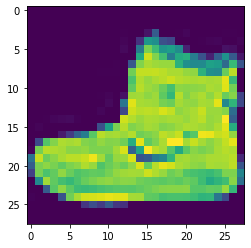

In [181]:
plt.imshow(x_train[0])
plt.show()

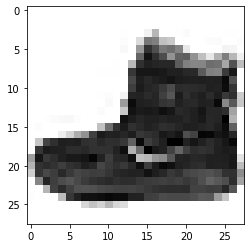

In [182]:
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [183]:
y_train[0]

9

In [186]:
#comapring the same with kaggle data and see if we can plot the same to visualise
import os
os.chdir("C:\\Users\\vidya\\Anaconda3")

In [204]:
train_df=pd.read_csv("fashion-mnist_train.csv")
test_df=pd.read_csv("fashion-mnist_test.csv")

In [205]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [206]:
X_train=train_df.drop(columns=["label"])

In [207]:
X_train.shape

(60000, 784)

In [208]:
X_train=np.array(X_train)

In [209]:
X_train=X_train.reshape(-1,28,28)

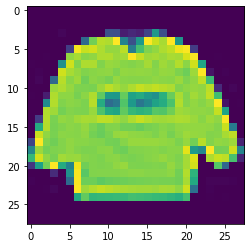

In [210]:
plt.imshow(X_train[0])
plt.show()

In [211]:
Y_train=train_df["label"]

In [212]:
Y_train[0]

2

In [213]:
#create a fucntion to process the kaggle images datasets
def data_preprocess(df):
    X=df.drop(columns=["label"])
    y=df["label"]
    X=np.array(X)
    X=X.reshape(-1,28,28)
    X=X/255.0
    return X,y

In [216]:
X_train,y_train=data_preprocess(train_df)
X_test,y_test=data_preprocess(test_df)

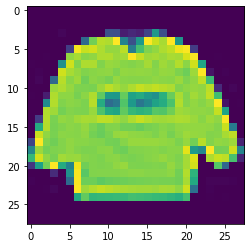

In [217]:
plt.imshow(X_train[0])
plt.show()

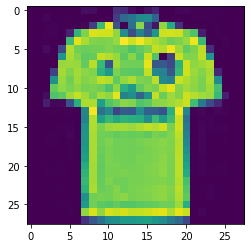

In [218]:
plt.imshow(X_test[0])
plt.show()

In [219]:
y_test[0]

0

In [ ]:
#tensor flow takes images like image dmesnions and a channel,so our 28*28 image will be a 28*28*1 or 28*28*3 based on b/wor color image

In [222]:
X_train=X_train.reshape(-1,28,28,1)

In [ ]:
X_test=X_test.reshape(-1,28,28,1)

In [278]:
X_train.shape

(60000, 28, 28, 1)

In [279]:
X_train.shape[1:]

(28, 28, 1)

In [286]:
#since we have multople classes we have to encode them as well
y_train=keras.utils.to_categorical(y_train, num_classes=10, dtype='float32')

In [293]:
y_test=keras.utils.to_categorical(y_test, num_classes=10, dtype='float32')

In [287]:
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D
from keras.losses import categorical_crossentropy
from keras.optimizers import adam
from keras.activations import relu
from keras.layers import Dropout

In [288]:
model=Sequential()
model.add(Conv2D(128,kernel_size=(3,3),activation="relu",input_shape=(X_train.shape[1:])))
model.add(MaxPooling2D())
#model.add(Dropout(0.2))

model.add(Conv2D(128,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D())
#model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(64))
model.add(Dense(10,activation="softmax"))

In [289]:
model.summary()

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_40 (Conv2D)           (None, 26, 26, 128)       1280      
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 13, 13, 128)       0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 11, 11, 128)       147584    
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 3200)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                204864    
_________________________________________________________________
dense_12 (Dense)             (None, 10)              

In [290]:
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["accuracy"])

In [291]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
60000/60000 [==============================] - 279s 5ms/step - loss: 0.4143 - accuracy: 0.8514
Epoch 2/10
60000/60000 [==============================] - 300s 5ms/step - loss: 0.2874 - accuracy: 0.8947
Epoch 3/10
60000/60000 [==============================] - 302s 5ms/step - loss: 0.2477 - accuracy: 0.9102
Epoch 4/10
60000/60000 [==============================] - 317s 5ms/step - loss: 0.2181 - accuracy: 0.9194
Epoch 5/10
60000/60000 [==============================] - 316s 5ms/step - loss: 0.1945 - accuracy: 0.9285
Epoch 6/10
60000/60000 [==============================] - 316s 5ms/step - loss: 0.1785 - accuracy: 0.9344
Epoch 7/10
60000/60000 [==============================] - 320s 5ms/step - loss: 0.1615 - accuracy: 0.9401
Epoch 8/10
60000/60000 [==============================] - 327s 5ms/step - loss: 0.1462 - accuracy: 0.94600s - loss: 0.1461 - accuracy
Epoch 9/10
60000/60000 [==============================] - 334s 6ms/step - loss: 0.1333 - accuracy: 0.9508
Epoch 10/10
60000/

In [298]:
X_test=X_test.reshape(-1,28,28,1)

In [301]:
evaluation=model.evaluate(X_test,y_test)

10000/10000 [==============================] - 19s 2ms/step


In [302]:
evaluation

[0.29191851776093247, 0.9106000065803528]

In [304]:
loss=evaluation[0]
accuracy=evaluation[1]
print("the loss is {} and accuracy is {}".format(loss,accuracy))

the loss is 0.29191851776093247 and accuracy is 0.9106000065803528


In [305]:
model.save("fashion_mnist_cnn170320")